In [1]:
# Import modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
train = pd.read_csv('../data/train.csv', index_col=0)
train_clean = pd.read_csv('../data/train_clean.csv', index_col=0)
test = pd.read_csv('../data/test.csv', index_col=0)

In [2]:
#Create building age and remodel age columns
building_age = 2019-train[['YearBuilt']]
re_age = 2019-train[['YearRemodAdd']]
train = train.assign(building_age=building_age, re_age=re_age)

In [42]:
#normalize
nreage = (train.re_age - train.re_age.mean())/train.re_age.std()
nbage = (train.building_age - train.building_age.mean())/train.building_age.std()
ngla = (train.GrLivArea - train.GrLivArea.mean())/train.GrLivArea.std()
noq = (train.OverallQual - train.OverallQual.mean())/train.OverallQual.std()
nla = (train.LotArea - train.LotArea.mean())/train.LotArea.std()
nor_sale = (train[['SalePrice']] - train[['SalePrice']].mean())/train[['SalePrice']].std()


intercept 0.00
slope -0.507101
R-Squared 0.26
RSS 1083.82


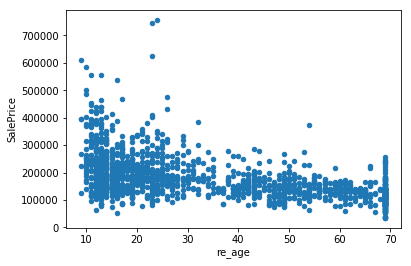

In [43]:
#normalize re_age
nlm = LinearRegression()
nlm.fit(nor_sale, nreage)
print('intercept %.2f' %(nlm.intercept_))
print('slope %.6f' %(nlm.coef_))
print('R-Squared %.2f' %(nlm.score(nor_sale,nreage)))
print('RSS %.2f' %(np.sum((nreage - nlm.predict(nor_sale))**2)))
train.plot.scatter(x='re_age', y='SalePrice')

intercept -0.00
slope -0.522897
R-Squared 0.27
RSS 1060.08


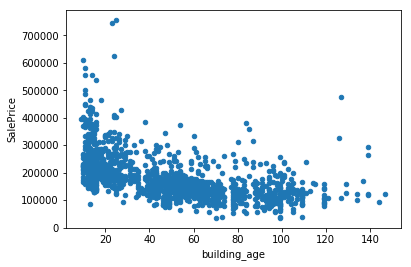

In [44]:
#normalize building_age
nlm1 = LinearRegression()
nlm1.fit(nor_sale, nbage)
print('intercept %.2f' %(nlm1.intercept_))
print('slope %.6f' %(nlm1.coef_))
print('R-Squared %.2f' %(nlm1.score(nor_sale,nbage)))
print('RSS %.2f' %(np.sum((nbage - nlm1.predict(nor_sale))**2)))
train.plot.scatter(x='building_age', y='SalePrice')

intercept -0.00
slope 0.708624
R-Squared 0.50
RSS 726.37


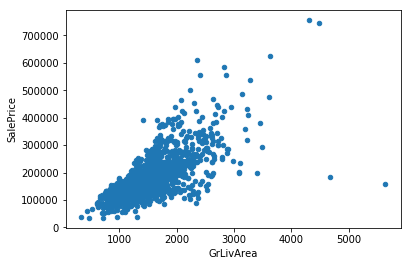

In [45]:
#normalize GrLivArea
nlm2 = LinearRegression()
nlm2.fit(nor_sale, ngla)
print('intercept %.2f' %(nlm2.intercept_))
print('slope %.6f' %(nlm2.coef_))
print('R-Squared %.2f' %(nlm2.score(nor_sale,ngla)))
print('RSS %.2f' %(np.sum((ngla - nlm2.predict(nor_sale))**2)))
train.plot.scatter(x='GrLivArea', y='SalePrice')

intercept 0.00
slope 0.79098
R-Squared 0.63
RSS 546.17


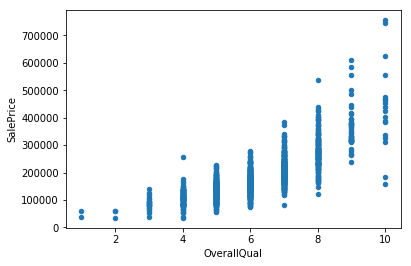

In [46]:
#normalize OverallQual
nlm3 = LinearRegression()
nlm3.fit(nor_sale, noq)
print('intercept %.2f' %(nlm3.intercept_))
print('slope %.5f' %(nlm3.coef_))
print('R-Squared %.2f' %(nlm3.score(nor_sale,noq)))
print('RSS %.2f' %(np.sum((noq - nlm3.predict(nor_sale))**2)))
train.plot.scatter(x='OverallQual', y='SalePrice')

intercept -0.00
slope 0.263843
R-Squared 0.07
RSS 1357.43


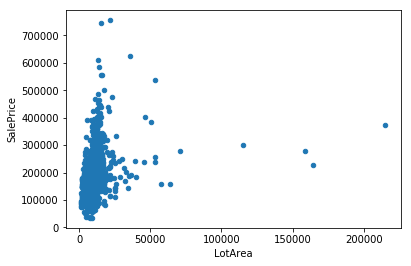

In [47]:
#normalize LotArea
nlm4 = LinearRegression()
nlm4.fit(nor_sale, nla)
print('intercept %.2f' %(nlm4.intercept_))
print('slope %.6f' %(nlm4.coef_))
print('R-Squared %.2f' %(nlm4.score(nor_sale,nla)))
print('RSS %.2f' %(np.sum((nla - nlm4.predict(nor_sale))**2)))
train.plot.scatter(x='LotArea', y='SalePrice')